In [2]:
library(dplyr)
library(DESeq2)
library(stringr)
library(tximport)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package

In [8]:
(sampleTable <- read.table("Z_capensis.Transcriptome.tsv", sep = "\t", header = T))            

Treatment,Rep,filename
<chr>,<chr>,<chr>
Heat_stressed,Heat_stressed_rep1,IonXpressRNA_001_rawlib.basecaller.fastq
Heat_stressed,Heat_stressed_rep2,IonXpressRNA_002_rawlib.basecaller.fastq
Heat_stressed,Heat_stressed_rep3,IonXpressRNA_003_rawlib.basecaller.fastq
Control,Control_rep1,IonXpressRNA_004_rawlib.basecaller.fastq
Control,Control_rep2,IonXpressRNA_005_rawlib.basecaller.fastq
Control,Control_rep3,IonXpressRNA_006_rawlib.basecaller.fastq


In [9]:
table(sampleTable$Treatment,sampleTable$Rep)

               
                Control_rep1 Control_rep2 Control_rep3 Heat_stressed_rep1
  Control                  1            1            1                  0
  Heat_stressed            0            0            0                  1
               
                Heat_stressed_rep2 Heat_stressed_rep3
  Control                        0                  0
  Heat_stressed                  1                  1

In [10]:
xtabs(~Treatment + Rep ,data = sampleTable)

               Rep
Treatment       Control_rep1 Control_rep2 Control_rep3 Heat_stressed_rep1
  Control                  1            1            1                  0
  Heat_stressed            0            0            0                  1
               Rep
Treatment       Heat_stressed_rep2 Heat_stressed_rep3
  Control                        0                  0
  Heat_stressed                  1                  1

In [11]:
sampleTable2 <- sampleTable %>%
                dplyr::mutate(quantfile = str_replace(filename, "basecaller.fastq","sf"))

In [12]:
(quant_files <- file.path("/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw/", sampleTable2$quantfile))

[1] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_001_rawlib.sf"
[2] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_002_rawlib.sf"
[3] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_003_rawlib.sf"
[4] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_004_rawlib.sf"
[5] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_005_rawlib.sf"
[6] "/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_006_rawlib.sf"

In [13]:
names(quant_files)  <- sampleTable2$filename

In [14]:
quant_files

IonXpressRNA_001_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_001_rawlib.sf" 
                                               IonXpressRNA_002_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_002_rawlib.sf" 
                                               IonXpressRNA_003_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_003_rawlib.sf" 
                                               IonXpressRNA_004_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_004_rawlib.sf" 
                                               IonXpressRNA_005_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_005_rawlib.sf" 
                                               IonXpressRNA_006_rawlib.basecaller.fastq 
"/Users/andhlovu/Documents/RNA-seq-devs/DESeq2X/Salmon_raw//IonXpressRNA_006_rawlib.sf"

In [20]:
rownames(sampleTable) <- colnames(tx_Data$counts)

In [19]:
sampleTable

,Treatment,Rep,filename
,<chr>,<chr>,<chr>
IonXpressRNA_001_rawlib.basecaller.fastq,Heat_stressed,Heat_stressed_rep1,IonXpressRNA_001_rawlib.basecaller.fastq
IonXpressRNA_002_rawlib.basecaller.fastq,Heat_stressed,Heat_stressed_rep2,IonXpressRNA_002_rawlib.basecaller.fastq
IonXpressRNA_003_rawlib.basecaller.fastq,Heat_stressed,Heat_stressed_rep3,IonXpressRNA_003_rawlib.basecaller.fastq
IonXpressRNA_004_rawlib.basecaller.fastq,Control,Control_rep1,IonXpressRNA_004_rawlib.basecaller.fastq
IonXpressRNA_005_rawlib.basecaller.fastq,Control,Control_rep2,IonXpressRNA_005_rawlib.basecaller.fastq
IonXpressRNA_006_rawlib.basecaller.fastq,Control,Control_rep3,IonXpressRNA_006_rawlib.basecaller.fastq


In [15]:
tx_Data <- tximport::tximport(quant_files, type = "salmon", txOut = T)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 




In [21]:
dsTxi <- DESeqDataSetFromTximport(tx_Data,
                                  colData = sampleTable,
                                  design = ~ Treatment)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
using counts and average transcript lengths from tximport



In [22]:
dds <- DESeq(dsTxi)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



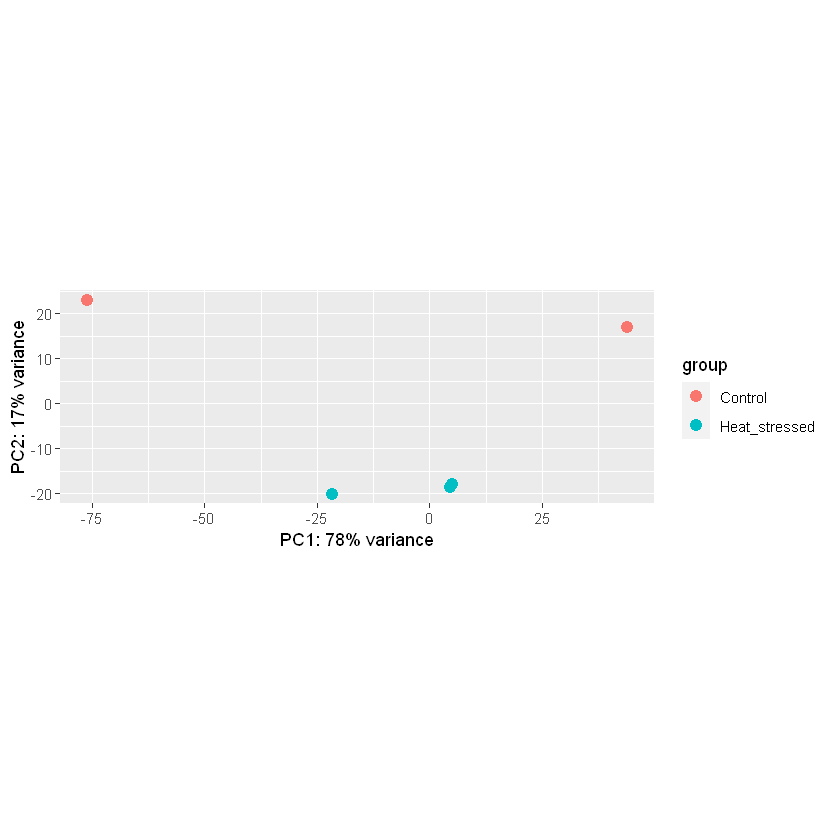

In [25]:
vsd <- vst(dds, blind=FALSE)
plotPCA(vsd, intgroup=c("Treatment"))